In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
os.chdir("/Users/saeed/Library/CloudStorage/OneDrive-DalhousieUniversity/0- Dalhousie University - Saeed/plotting/data")

In [4]:
df = pd.read_csv("1810024501_databaseLoadingData.csv")
df.head()

,REF_DATE,GEO,DGUID,Products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2017-01,Canada,2016A000011124,"Beef stewing cuts, per kilogram",Dollars,81,units,0,v1353834271,11.1,12.66,NaN,NaN,NaN,2
1,2017-02,Canada,2016A000011124,"Beef stewing cuts, per kilogram",Dollars,81,units,0,v1353834271,11.1,13.12,NaN,NaN,NaN,2
2,2017-03,Canada,2016A000011124,"Beef stewing cuts, per kilogram",Dollars,81,units,0,v1353834271,11.1,13.51,NaN,NaN,NaN,2
3,2017-04,Canada,2016A000011124,"Beef stewing cuts, per kilogram",Dollars,81,units,0,v1353834271,11.1,13.29,NaN,NaN,NaN,2
4,2017-05,Canada,2016A000011124,"Beef stewing cuts, per kilogram",Dollars,81,units,0,v1353834271,11.1,14.08,NaN,NaN,NaN,2


In [211]:
len(df['Products'].unique())

110

In [9]:
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])

essential_items = ['Milk, 1 litre', 'Milk, 2 litres', 'Milk, 4 litres', 'Eggs, 1 dozen',
                   'White bread, 675 grams', 'Laundry detergent, 4.43 litres']

non_essential_items = ['Salmon, per kilogram', 'Avocado, unit', 'Olive oil, 1 litre']

animal_proteins = ['Beef stewing cuts, per kilogram', 'Chicken breasts, per kilogram', 'Ground beef, per kilogram']
plant_proteins = ['Tofu, 350 grams ', 'Meatless burgers, 226 grams']

fresh_produce = ['Apples, per kilogram', 'Bananas, per kilogram', 'Oranges, per kilogram',
                 'Strawberries, 454 grams', 'Tomatoes, per kilogram']

atlantic_provinces = ['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick']

monthly_trends = df.groupby([df['REF_DATE'].dt.to_period('M'), 'GEO', 'Products'])['VALUE'].mean().reset_index()

yearly_trends = df.groupby([df['REF_DATE'].dt.year, 'GEO', 'Products'])['VALUE'].mean().reset_index()

seasonal_variation = df[df['Products'].isin(fresh_produce)].groupby([df['REF_DATE'].dt.month, 'Products'])['VALUE'].mean().unstack()

essential_prices = df[df['Products'].isin(essential_items)].groupby(['GEO', 'Products'])['VALUE'].mean().unstack()

volatility = df[df['GEO'].isin(['Alberta', 'Nova Scotia'])].groupby(['GEO', 'Products'])['VALUE'].std().unstack(level=0)

protein_trends = df[df['Products'].isin(animal_proteins + plant_proteins)].groupby([df['REF_DATE'].dt.year, 'Products'])['VALUE'].mean().unstack()

essential_nonessential_trends = df[df['Products'].isin(essential_items + non_essential_items)].groupby([df['REF_DATE'].dt.year, 'Products'])['VALUE'].mean().unstack()

df_atlantic = df[df['GEO'].isin(atlantic_provinces)]
atlantic_first_last = df_atlantic.groupby(['Products']).agg(
    first=('VALUE', lambda x: x[df_atlantic['REF_DATE'].dt.year == 2017].mean()),
    last=('VALUE', lambda x: x[df_atlantic['REF_DATE'].dt.year == 2025].mean())
)
atlantic_first_last['pct_change'] = ((atlantic_first_last['last'] - atlantic_first_last['first']) / atlantic_first_last['first']) * 100
largest_changes_atlantic = atlantic_first_last.sort_values('pct_change', ascending=False)


In [12]:
monthly_trends.head()
yearly_trends.head()
seasonal_variation
essential_prices
volatility
protein_trends
essential_nonessential_trends

,first,last,pct_change
Products,,,
"Salad greens, 142 grams",4.168750,4.596250,10.254873
"Nut milk, 1.89 litres",3.889375,4.265000,9.657721
"Pork rib cuts, per kilogram",7.469792,8.138125,8.947148
"Soy milk, 1.89 litres",3.916042,4.234375,8.128957
"Canned tuna, 170 grams",1.665417,1.771250,6.354766
"Bananas, per kilogram",1.997292,2.092500,4.766872
"Dry beans and legumes, 900 grams",3.540208,3.700625,4.531278
"Lemons, unit",1.021667,1.055625,3.323817
"Shrimp, 300 grams",6.828333,7.033750,3.008299


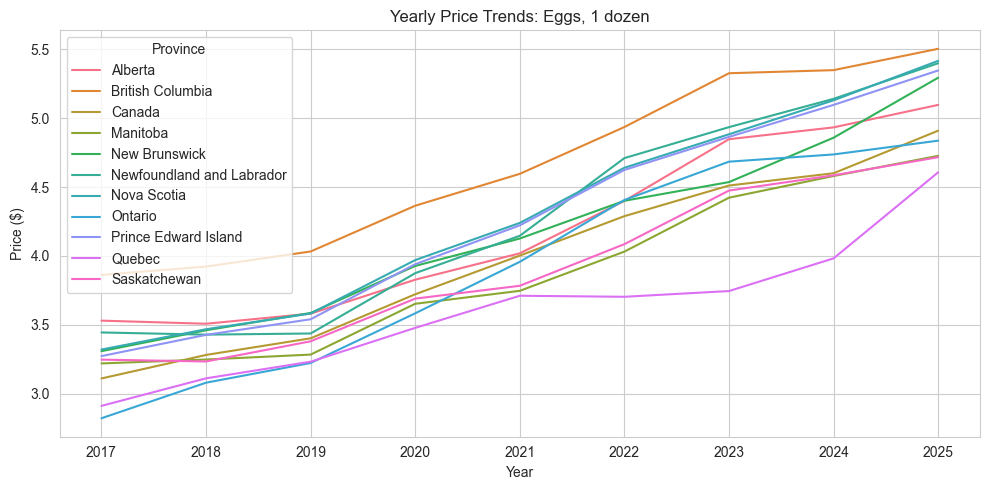

In [14]:
# 2️⃣ Yearly trends — example for one product (Eggs, 1 dozen)
product_example = 'Eggs, 1 dozen'
df_plot = yearly_trends[yearly_trends['Products'] == product_example]
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_plot, x='REF_DATE', y='VALUE', hue='GEO')
plt.title(f'Yearly Price Trends: {product_example}')
plt.ylabel('Price ($)')
plt.xlabel('Year')
plt.legend(title='Province')
plt.tight_layout()
plt.show()

In [30]:
df_plot

,Quarter,GEO,VALUE
0,2017Q1,New Brunswick,2.233333
1,2017Q1,Newfoundland and Labrador,2.806667
2,2017Q1,Nova Scotia,2.366667
3,2017Q1,Prince Edward Island,2.133333
4,2017Q2,New Brunswick,2.243333
...,...,...,...
131,2025Q1,Prince Edward Island,2.800000
132,2025Q2,New Brunswick,2.720000
133,2025Q2,Newfoundland and Labrador,3.640000
134,2025Q2,Nova Scotia,3.120000


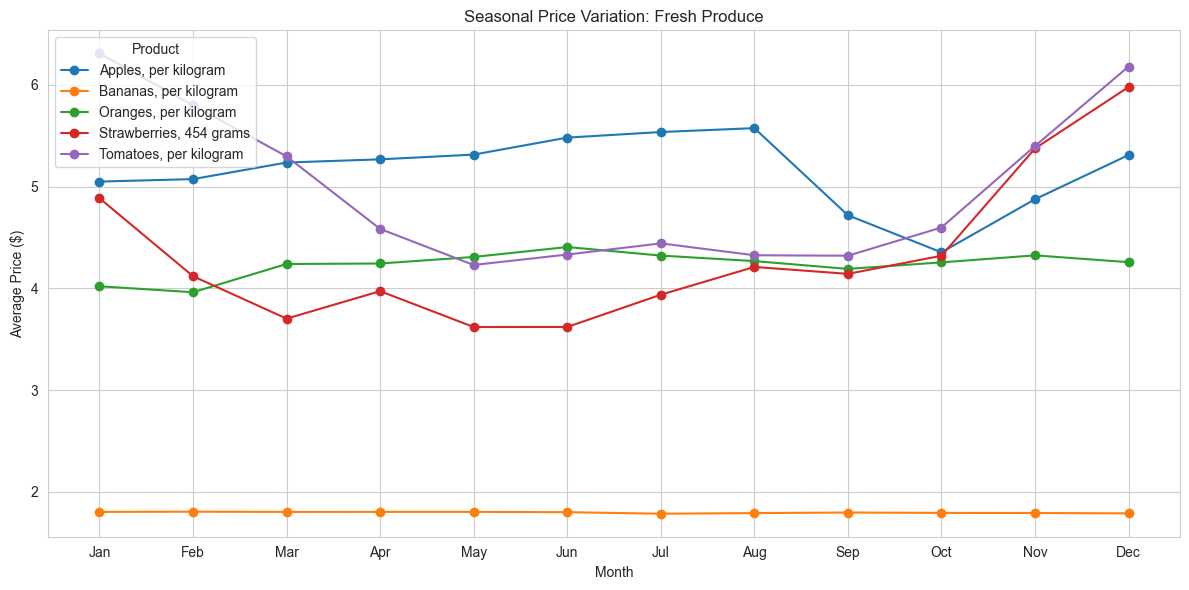

In [15]:
seasonal_variation.plot(figsize=(12, 6), marker='o')
plt.title('Seasonal Price Variation: Fresh Produce')
plt.ylabel('Average Price ($)')
plt.xlabel('Month')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Product')
plt.tight_layout()
plt.show()

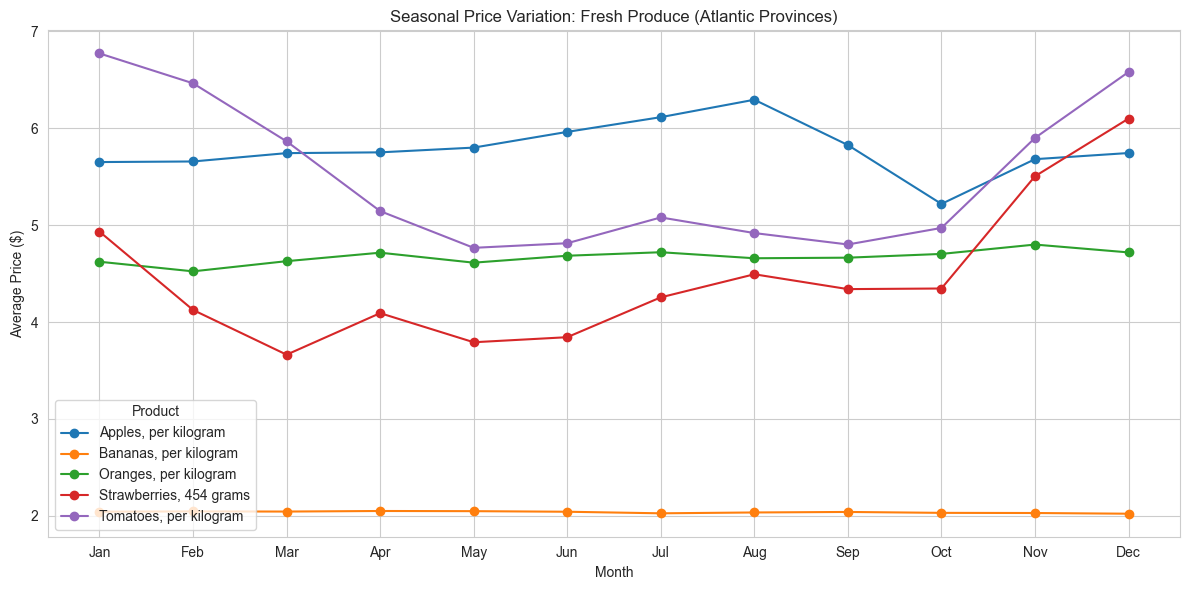

In [97]:
df_atl_fresh = df_atl[df_atl['Products'].isin(fresh_produce)]
seasonal_variation_atl = df_atl_fresh.groupby([df_atl_fresh['REF_DATE'].dt.month, 'Products'])['VALUE'].mean().unstack()

seasonal_variation_atl.plot(figsize=(12, 6), marker='o')
plt.title('Seasonal Price Variation: Fresh Produce (Atlantic Provinces)')
plt.ylabel('Average Price ($)')
plt.xlabel('Month')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Product')
plt.tight_layout()
plt.show()


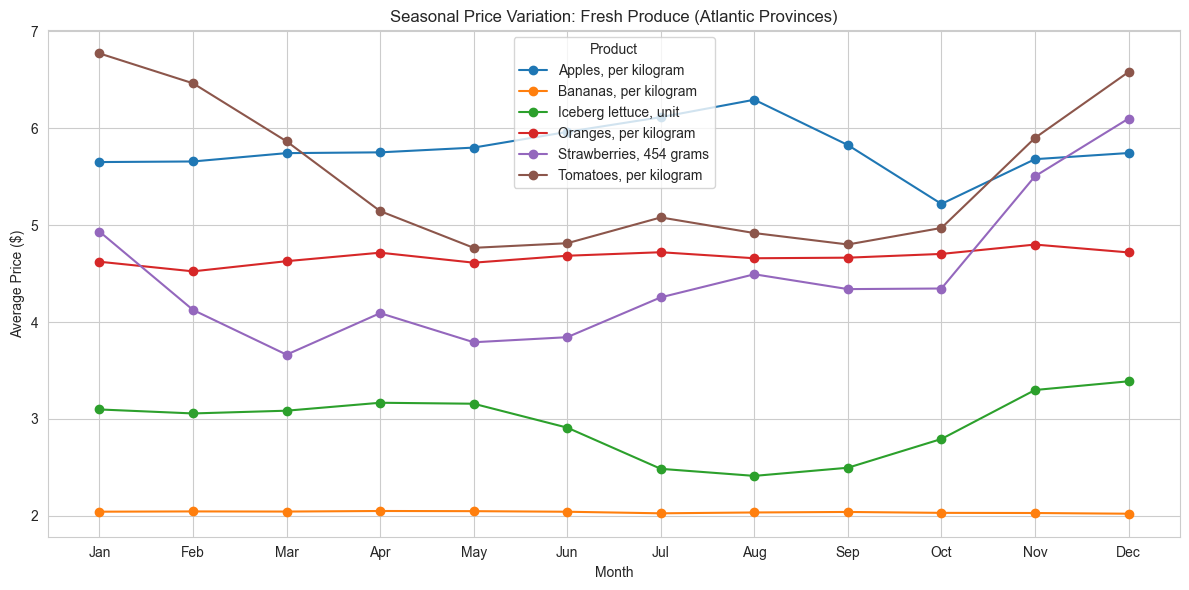

In [95]:
seasonal_products_selected = [
    'Apples, per kilogram',
    'Bananas, per kilogram',
    'Oranges, per kilogram',
    'Strawberries, 454 grams',
    'Tomatoes, per kilogram',
    #'Peppers, per kilogram',
    'Iceberg lettuce, unit',
      #  'Cucumber, unit',
       # 'Grapes, per kilogram',


]

df_atl_fresh = df_atl[df_atl['Products'].isin(seasonal_products_selected)]
seasonal_variation_atl = df_atl_fresh.groupby([df_atl_fresh['REF_DATE'].dt.month, 'Products'])['VALUE'].mean().unstack()

seasonal_variation_atl.plot(figsize=(12, 6), marker='o')
plt.title('Seasonal Price Variation: Fresh Produce (Atlantic Provinces)')
plt.ylabel('Average Price ($)')
plt.xlabel('Month')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Product')
plt.tight_layout()
plt.show()


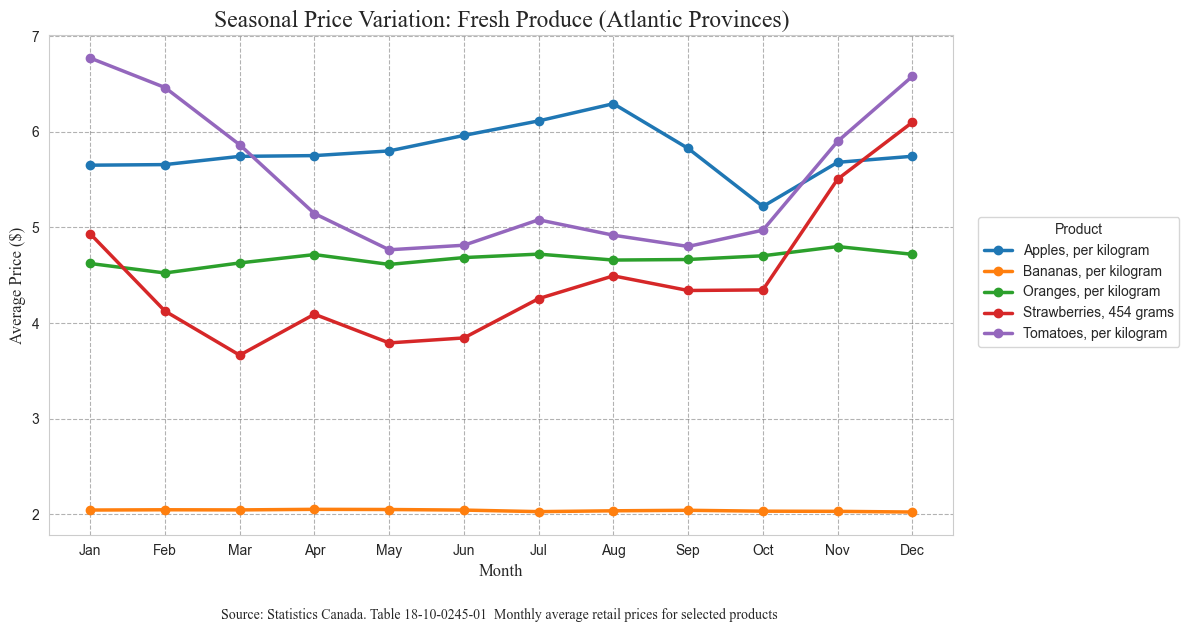

In [166]:
seasonal_variation_atl.plot(figsize=(12, 6), marker='o', lw = 2.5)
plt.title('Seasonal Price Variation: Fresh Produce (Atlantic Provinces)', 
         fontsize=17, fontname='Times New Roman')
plt.ylabel('Average Price ($)', fontsize=12, fontname='Times New Roman')
plt.xlabel('Month', fontsize=12, fontname='Times New Roman')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#plt.legend(title='Product', loc='center left', bbox_to_anchor=(-0.25, 0.5))
plt.legend(title='Product', bbox_to_anchor=(1.02, 0.65), loc='upper left')

plt.grid(ls='--', c = 'k', alpha=0.3)

plt.figtext(0.42, -0.04,
            'Source: Statistics Canada. Table 18-10-0245-01  Monthly average retail prices for selected products',
            wrap=True, horizontalalignment='center', fontsize=10, fontname='Times New Roman', weight='medium')


plt.tight_layout()

#plt.savefig('Seasonal_Price_Variation_Fresh_Produce.png', dpi=500, bbox_inches='tight')
plt.show()

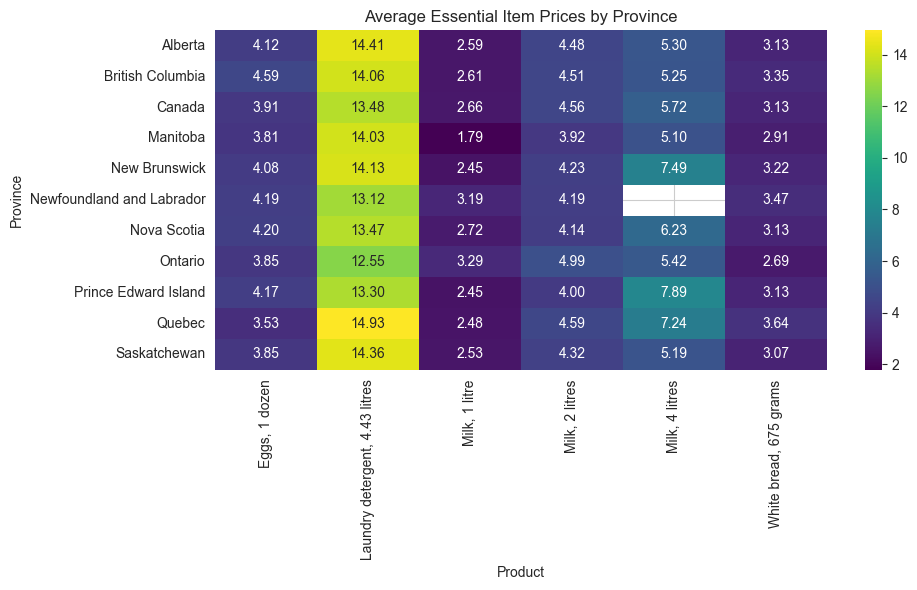

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(essential_prices, annot=True, fmt=".2f", cmap='viridis')
plt.title('Average Essential Item Prices by Province')
plt.ylabel('Province')
plt.xlabel('Product')
plt.tight_layout()
plt.show()

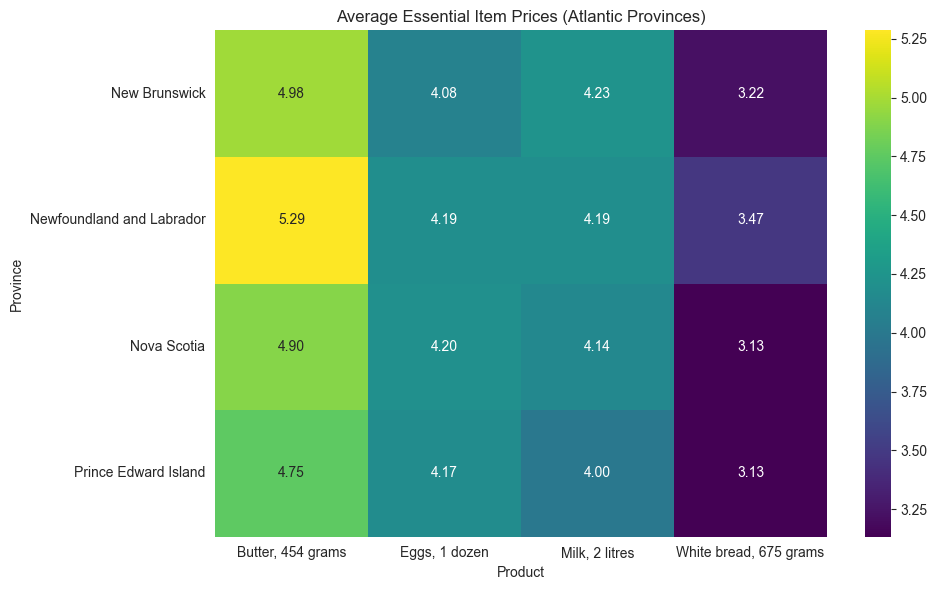

In [86]:
#essential_items_clean = ['Milk, 2 litres', 'Eggs, 1 dozen', 'White bread, 675 grams', 'Laundry detergent, 4.43 litres', 'Butter, 454 grams']
essential_items_clean = ['Milk, 2 litres', 'Eggs, 1 dozen', 'White bread, 675 grams', 'Butter, 454 grams']

essential_prices_atl = df_atl[df_atl['Products'].isin(essential_items_clean)].groupby(['GEO', 'Products'])['VALUE'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(essential_prices_atl, annot=True, fmt=".2f", cmap='viridis')
plt.title('Average Essential Item Prices (Atlantic Provinces)')
plt.ylabel('Province')
plt.xlabel('Product')
plt.tight_layout()
plt.show()

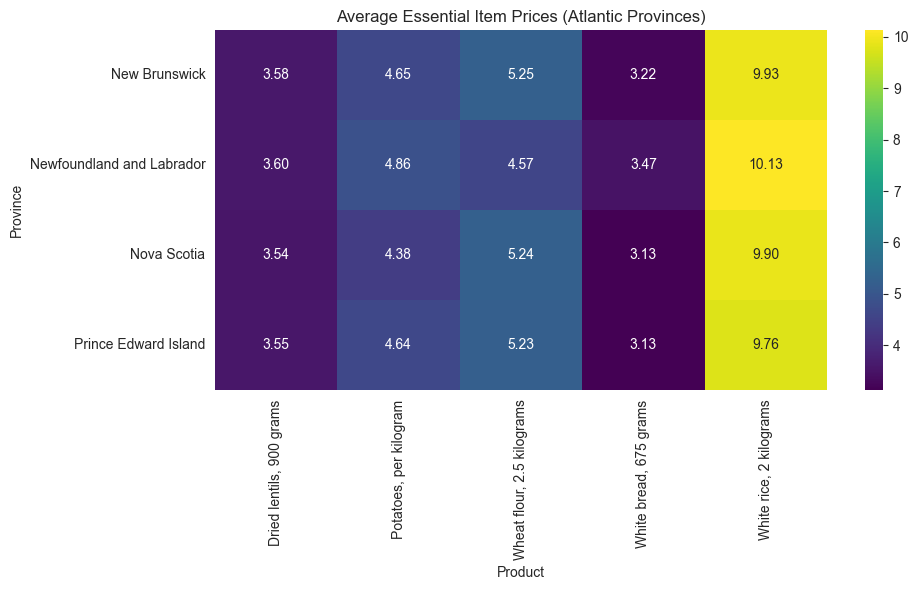

In [87]:
#essential_items_clean = ['Milk, 2 litres', 'Eggs, 1 dozen', 'White bread, 675 grams', 'Laundry detergent, 4.43 litres', 'Butter, 454 grams']
essential_items_clean = ['Milk, 2 litres', 'Eggs, 1 dozen', 'White bread, 675 grams', 'Butter, 454 grams']
essential_items_final = [
    'Wheat flour, 2.5 kilograms',
    'White rice, 2 kilograms',
    'White bread, 675 grams',
    'Potatoes, per kilogram',
    'Dried lentils, 900 grams'
]

essential_prices_atl = df_atl[df_atl['Products'].isin(essential_items_final)].groupby(['GEO', 'Products'])['VALUE'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(essential_prices_atl, annot=True, fmt=".2f", cmap='viridis')
plt.title('Average Essential Item Prices (Atlantic Provinces)')
plt.ylabel('Province')
plt.xlabel('Product')
plt.tight_layout()
plt.show()

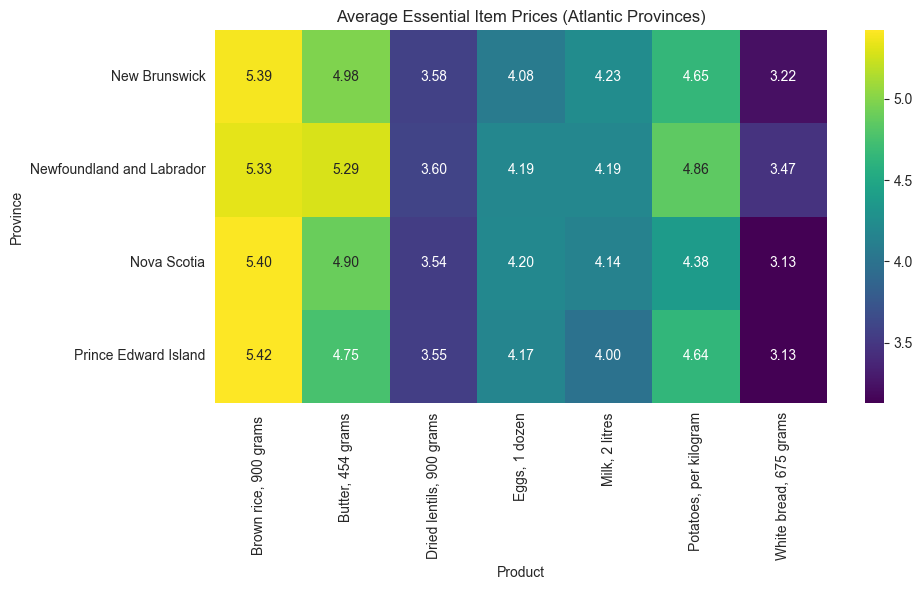

In [102]:
#essential_items_clean = ['Milk, 2 litres', 'Eggs, 1 dozen', 'White bread, 675 grams', 'Laundry detergent, 4.43 litres', 'Butter, 454 grams']
essential_items_clean = ['Milk, 2 litres', 'Eggs, 1 dozen', 'White bread, 675 grams', 'Butter, 454 grams']
#essential_items_final = [
#    'Wheat flour, 2.5 kilograms',
#    'White rice, 2 kilograms',
#    'White bread, 675 grams',
#    'Potatoes, per kilogram',
#    'Dried lentils, 900 grams'
#]
essential_items_final = [
    'White bread, 675 grams',
    'Potatoes, per kilogram',
    'Dried lentils, 900 grams',
    'Milk, 2 litres',
    'Eggs, 1 dozen',
    'Butter, 454 grams',
  #  'Brown rice, 900 grams '
]

essential_items_final = [
    'White bread, 675 grams',
    'Potatoes, per kilogram',
    'Dried lentils, 900 grams',
    'Milk, 2 litres',
    'Eggs, 1 dozen',
    'Butter, 454 grams',
    'Brown rice, 900 grams '
]



essential_prices_atl = df_atl[df_atl['Products'].isin(essential_items_final)].groupby(['GEO', 'Products'])['VALUE'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(essential_prices_atl, annot=True, fmt=".2f", cmap='viridis')
plt.title('Average Essential Item Prices (Atlantic Provinces)')
plt.ylabel('Province')
plt.xlabel('Product')
plt.tight_layout()
plt.show()

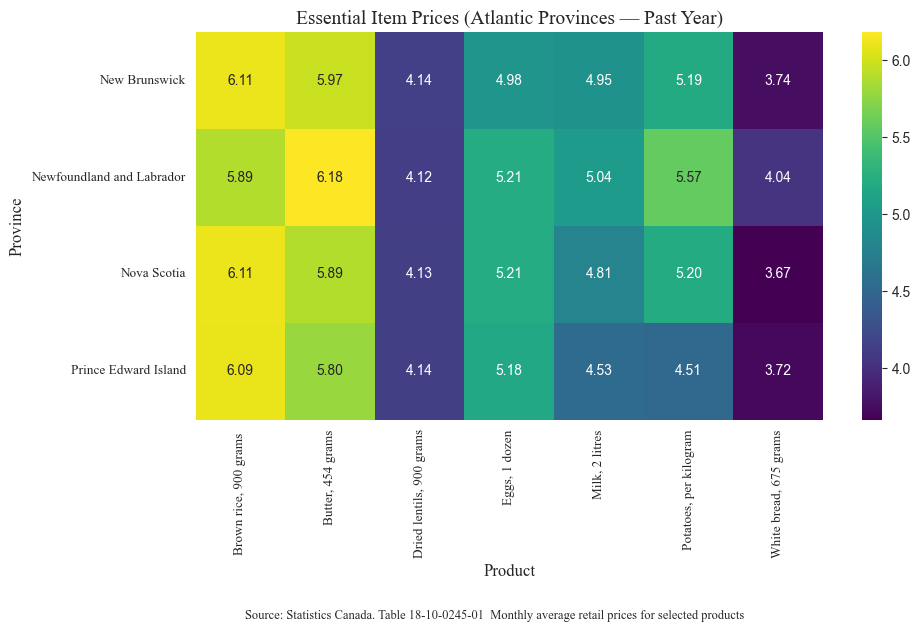

In [170]:
df_atl_past_year = df_atl[df_atl['REF_DATE'] >= '2024-02-01']

essential_prices_atl_past_year = df_atl_past_year[df_atl_past_year['Products'].isin(essential_items_final)].groupby(['GEO', 'Products'])['VALUE'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(essential_prices_atl_past_year, annot=True, fmt=".2f", cmap='viridis')
plt.title('Essential Item Prices (Atlantic Provinces — Past Year)',
         fontsize=14, fontname='Times New Roman')
plt.ylabel('Province', fontsize=12, fontname='Times New Roman')
plt.xlabel('Product', fontsize=12, fontname='Times New Roman')
plt.xticks(fontsize=9.5, fontname='Times New Roman')
plt.yticks(fontsize=9.5, fontname='Times New Roman')

plt.figtext(0.5, -0.04,
            'Source: Statistics Canada. Table 18-10-0245-01  Monthly average retail prices for selected products',
            wrap=True, horizontalalignment='center', fontsize=9, fontname='Times New Roman', weight='medium')

plt.tight_layout()
#plt.savefig('Essential_Item_Prices_Atlantic_Past_Year.png', dpi=500, bbox_inches='tight')
plt.show()

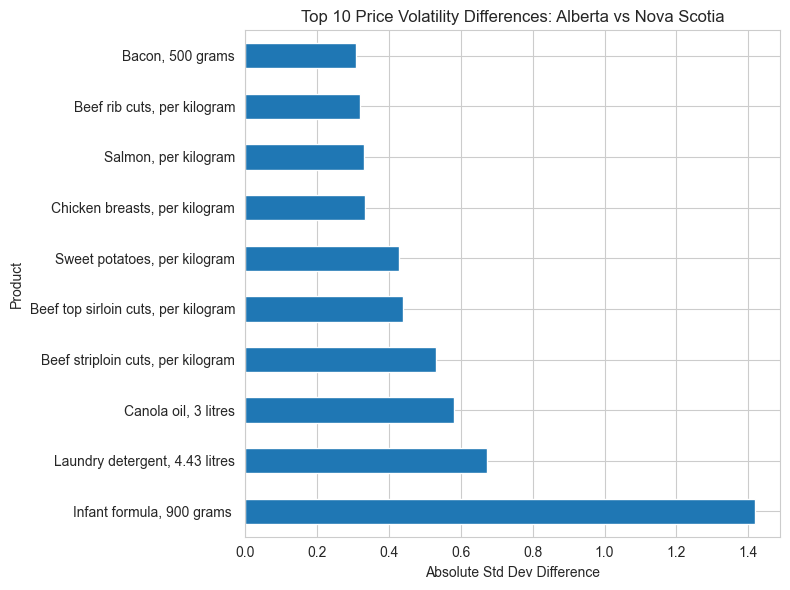

In [17]:
volatility_diff = (volatility['Alberta'] - volatility['Nova Scotia']).abs().sort_values(ascending=False).head(10)
volatility_diff.plot(kind='barh', figsize=(8, 6))
plt.title('Top 10 Price Volatility Differences: Alberta vs Nova Scotia')
plt.xlabel('Absolute Std Dev Difference')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

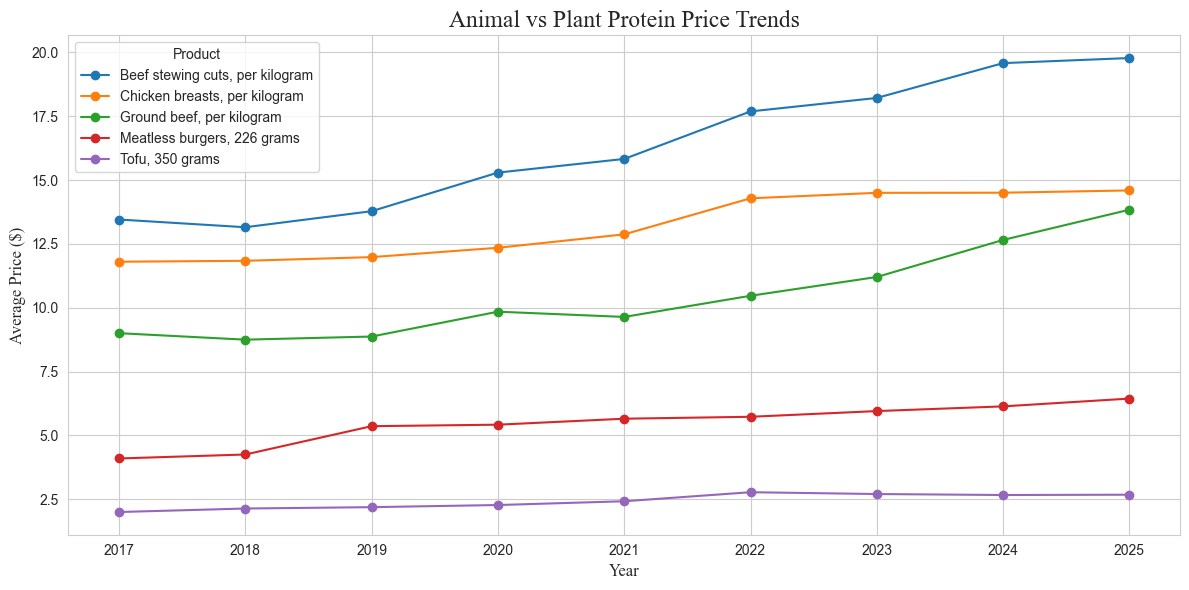

In [156]:
protein_trends.plot(figsize=(12, 6), marker='o')
plt.title('Animal vs Plant Protein Price Trends', fontsize=17, fontname='Times New Roman')
plt.ylabel('Average Price ($)', fontsize=12, fontname='Times New Roman')
plt.xlabel('Year', fontsize=12, fontname='Times New Roman')
plt.legend(title='Product')
plt.tight_layout()
plt.show()

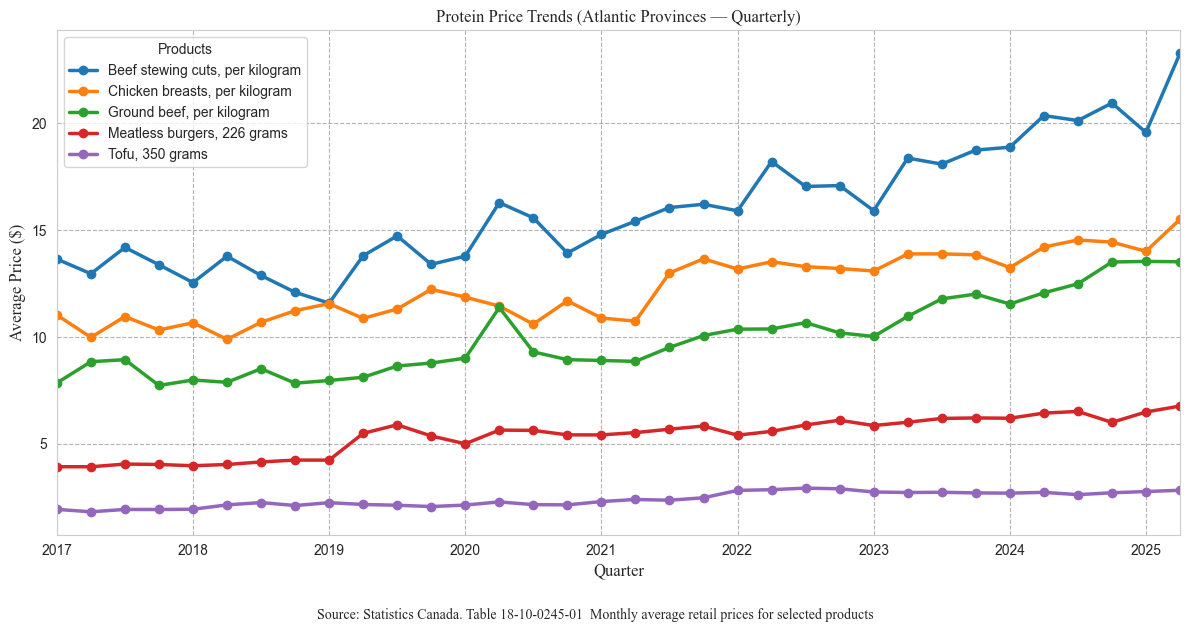

In [182]:
protein_products = animal_proteins + plant_proteins
df_atl_protein = df_atl[df_atl['Products'].isin(protein_products)]
df_atl_protein.loc[:,'Quarter'] = df_atl_protein['REF_DATE'].dt.to_period('Q')

protein_trends_atl = df_atl_protein.groupby(['Quarter', 'Products'])['VALUE'].mean().unstack()

protein_trends_atl.plot(figsize=(12, 6), marker='o', lw = 2.5)
plt.title('Protein Price Trends (Atlantic Provinces — Quarterly)',
         fontsize=12, fontname='Times New Roman')
plt.ylabel('Average Price ($)', fontsize=12, fontname='Times New Roman')
plt.xlabel('Quarter', fontsize=12, fontname='Times New Roman')

plt.grid(ls='--', c = 'k', alpha=0.3)

plt.figtext(0.5, -0.04,
            'Source: Statistics Canada. Table 18-10-0245-01  Monthly average retail prices for selected products',
            wrap=True, horizontalalignment='center', fontsize=10, fontname='Times New Roman', weight='medium')

plt.tight_layout()

#plt.savefig('Protein_Price_Trends_Atlantic_Quarterly.png', dpi=500, bbox_inches='tight')
plt.show()

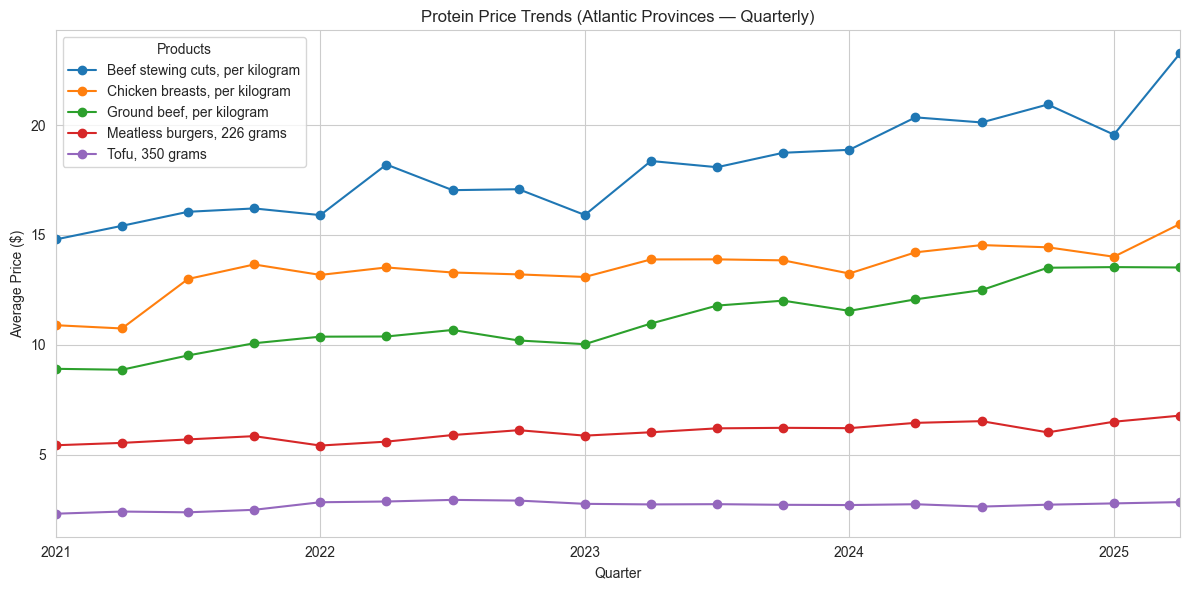

In [48]:
protein_products = animal_proteins + plant_proteins
df_atl_protein = df_atl[df_atl['Products'].isin(protein_products)]
df_atl_protein.loc[:,'Quarter'] = df_atl_protein['REF_DATE'].dt.to_period('Q')

protein_trends_atl = df_atl_protein.groupby(['Quarter', 'Products'])['VALUE'].mean().unstack()

protein_trends_atl.iloc[-18:].plot(figsize=(12, 6), marker='o')
plt.title('Protein Price Trends (Atlantic Provinces — Quarterly)')
plt.ylabel('Average Price ($)')
plt.xlabel('Quarter')
plt.tight_layout()
plt.show()

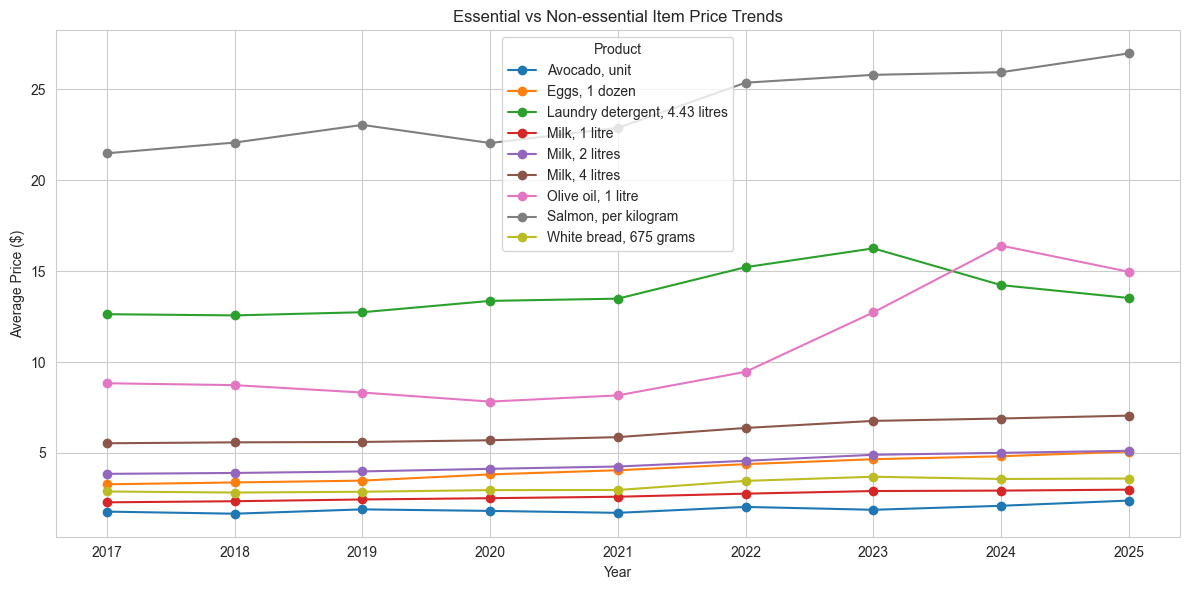

In [19]:
essential_nonessential_trends.plot(figsize=(12, 6), marker='o')
plt.title('Essential vs Non-essential Item Price Trends')
plt.ylabel('Average Price ($)')
plt.xlabel('Year')
plt.legend(title='Product')
plt.tight_layout()
plt.show()

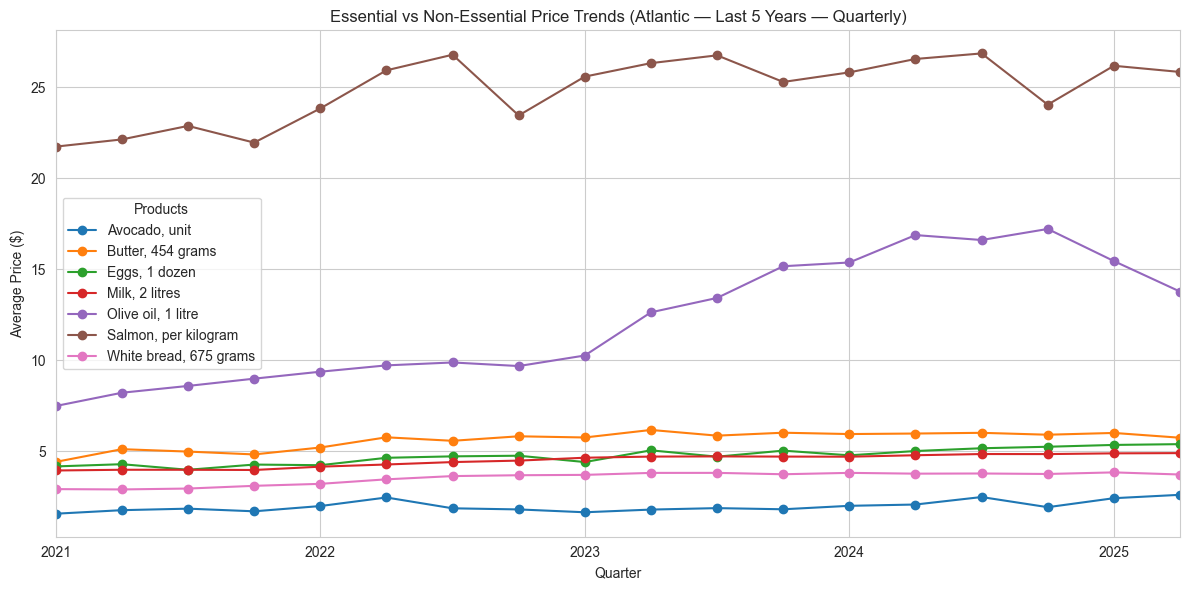

In [57]:
df_last5 = df_atl[df_atl['REF_DATE'] >= '2021-01-01']

essential_nonessential_products = essential_items_clean + non_essential_items
df_last5_e_ne = df_last5[df_last5['Products'].isin(essential_nonessential_products)]
df_last5_e_ne.loc[:,'Quarter'] = df_last5_e_ne['REF_DATE'].dt.to_period('Q')

essential_nonessential_trends_last5 = df_last5_e_ne.groupby(['Quarter', 'Products'])['VALUE'].mean().unstack()

#essential_nonessential_trends_last5.drop(["Salmon, per kilogram", 'Olive oil, 1 litre'], axis = 1).plot(figsize=(12, 6), marker='o')
essential_nonessential_trends_last5.plot(figsize=(12, 6), marker='o')

plt.title('Essential vs Non-Essential Price Trends (Atlantic — Last 5 Years — Quarterly)')
plt.ylabel('Average Price ($)')
plt.xlabel('Quarter')
plt.tight_layout()
plt.show()


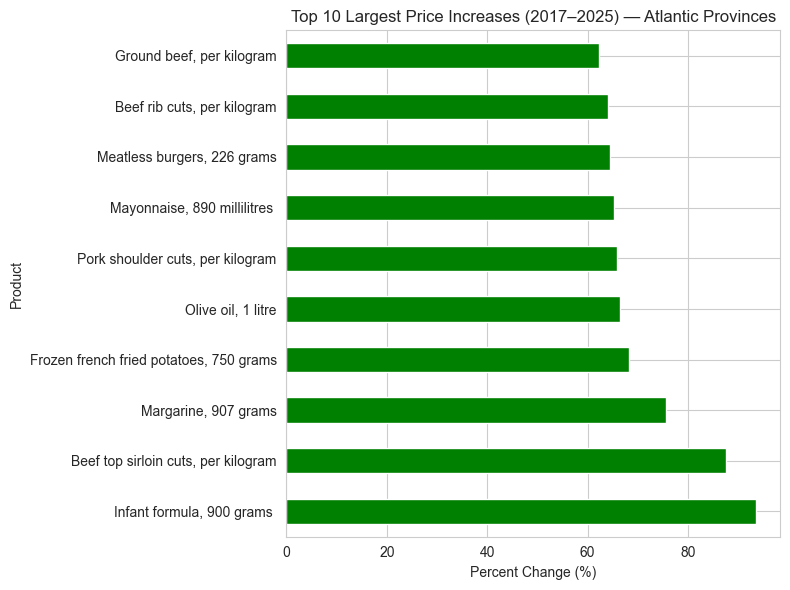

In [20]:
largest_changes_atlantic['pct_change'].head(10).plot(kind='barh', color='green', figsize=(8, 6))
plt.title('Top 10 Largest Price Increases (2017–2025) — Atlantic Provinces')
plt.xlabel('Percent Change (%)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

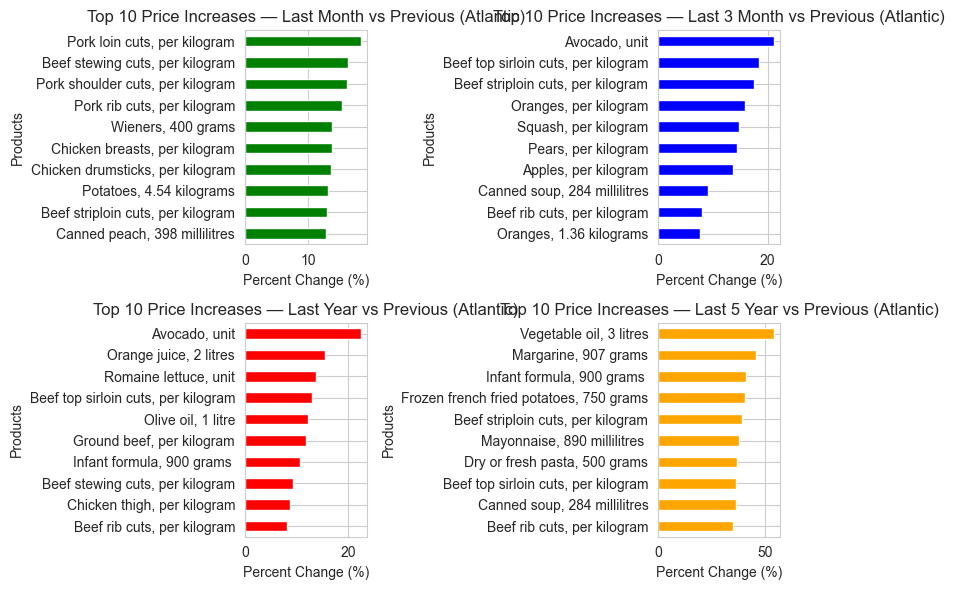

In [65]:
df_monthly = df_atl.groupby([df_atl['REF_DATE'].dt.to_period('M'), 'Products'])['VALUE'].mean().unstack()

monthly_change = df_monthly.pct_change(periods=1).iloc[-1] * 100

last3_avg = df_monthly.iloc[-3:].mean()
prev3_avg = df_monthly.iloc[-6:-3].mean()
change_3m = ((last3_avg - prev3_avg) / prev3_avg) * 100

last12_avg = df_monthly.iloc[-12:].mean()
prev12_avg = df_monthly.iloc[-24:-12].mean()
change_1y = ((last12_avg - prev12_avg) / prev12_avg) * 100

last5y_avg = df_monthly.iloc[-60:].mean()
prev5y_avg = df_monthly.iloc[-120:-60].mean()
change_5y = ((last5y_avg - prev5y_avg) / prev5y_avg) * 100


plt.subplot(2,2,1)
monthly_change.sort_values(ascending=False).head(10).plot(kind='barh', figsize=(8, 6), color='green')
plt.gca().invert_yaxis()
plt.title('Top 10 Price Increases — Last Month vs Previous (Atlantic)')
plt.xlabel('Percent Change (%)')
plt.tight_layout()
#plt.show()

plt.subplot(2,2,2)

change_3m.sort_values(ascending=False).head(10).plot(kind='barh', figsize=(8, 6), color='blue')
plt.gca().invert_yaxis()
plt.title('Top 10 Price Increases — Last 3 Month vs Previous (Atlantic)')
plt.xlabel('Percent Change (%)')
plt.tight_layout()
#plt.show()

plt.subplot(2,2,3)

change_1y.sort_values(ascending=False).head(10).plot(kind='barh', figsize=(8, 6), color='red')
plt.gca().invert_yaxis()
plt.title('Top 10 Price Increases — Last Year vs Previous (Atlantic)')
plt.xlabel('Percent Change (%)')
plt.tight_layout()
#plt.show()

plt.subplot(2,2,4)
change_5y.sort_values(ascending=False).head(10).plot(kind='barh', figsize=(8, 6), color='orange')
plt.gca().invert_yaxis()
plt.title('Top 10 Price Increases — Last 5 Year vs Previous (Atlantic)')
plt.xlabel('Percent Change (%)')
plt.tight_layout()
plt.show()

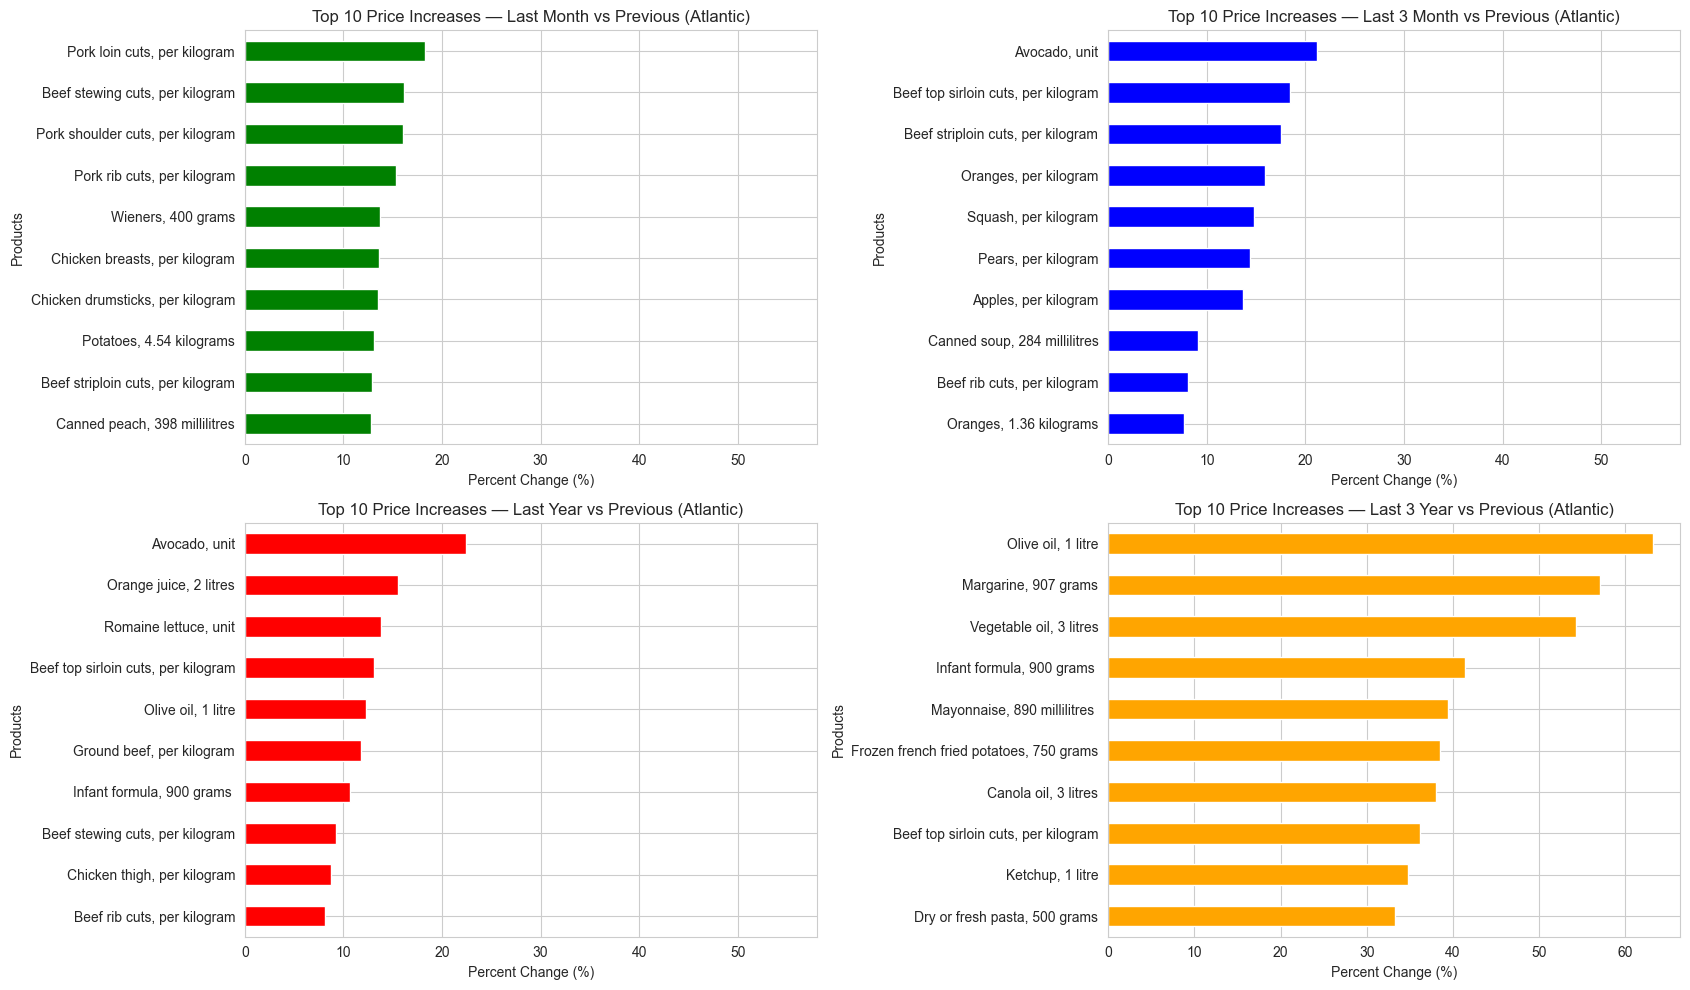

In [82]:
df_monthly = df_atl.groupby([df_atl['REF_DATE'].dt.to_period('M'), 'Products'])['VALUE'].mean().unstack()

monthly_change = df_monthly.pct_change(periods=1).iloc[-1] * 100

last3_avg = df_monthly.iloc[-3:].mean()
prev3_avg = df_monthly.iloc[-6:-3].mean()
change_3m = ((last3_avg - prev3_avg) / prev3_avg) * 100

last12_avg = df_monthly.iloc[-12:].mean()
prev12_avg = df_monthly.iloc[-24:-12].mean()
change_1y = ((last12_avg - prev12_avg) / prev12_avg) * 100

last5y_avg = df_monthly.iloc[-36:].mean()
prev5y_avg = df_monthly.iloc[-72:-36].mean()
change_5y = ((last5y_avg - prev5y_avg) / prev5y_avg) * 100

plt.figure(figsize=(17, 10))
plt.subplot(2,2,1)
monthly_change.sort_values(ascending=False).head(10).plot(kind='barh', color='green')
plt.gca().invert_yaxis()
plt.title('Top 10 Price Increases — Last Month vs Previous (Atlantic)')
plt.xlabel('Percent Change (%)')
plt.tight_layout()
plt.xlim(right=58)
#plt.show()

plt.subplot(2,2,2)

change_3m.sort_values(ascending=False).head(10).plot(kind='barh', color='blue')
plt.gca().invert_yaxis()
plt.title('Top 10 Price Increases — Last 3 Month vs Previous (Atlantic)')
plt.xlabel('Percent Change (%)')
plt.tight_layout()
plt.xlim(right=58)
#plt.show()

plt.subplot(2,2,3)

change_1y.sort_values(ascending=False).head(10).plot(kind='barh', color='red')
plt.gca().invert_yaxis()
plt.title('Top 10 Price Increases — Last Year vs Previous (Atlantic)')
plt.xlabel('Percent Change (%)')
plt.tight_layout()
plt.xlim(right=58)
#plt.show()

plt.subplot(2,2,4)
change_5y.sort_values(ascending=False).head(10).plot(kind='barh', color='orange')
plt.gca().invert_yaxis()
plt.title('Top 10 Price Increases — Last 3 Year vs Previous (Atlantic)')
plt.xlabel('Percent Change (%)')
plt.tight_layout()
#plt.xlim(right=58)

plt.show()

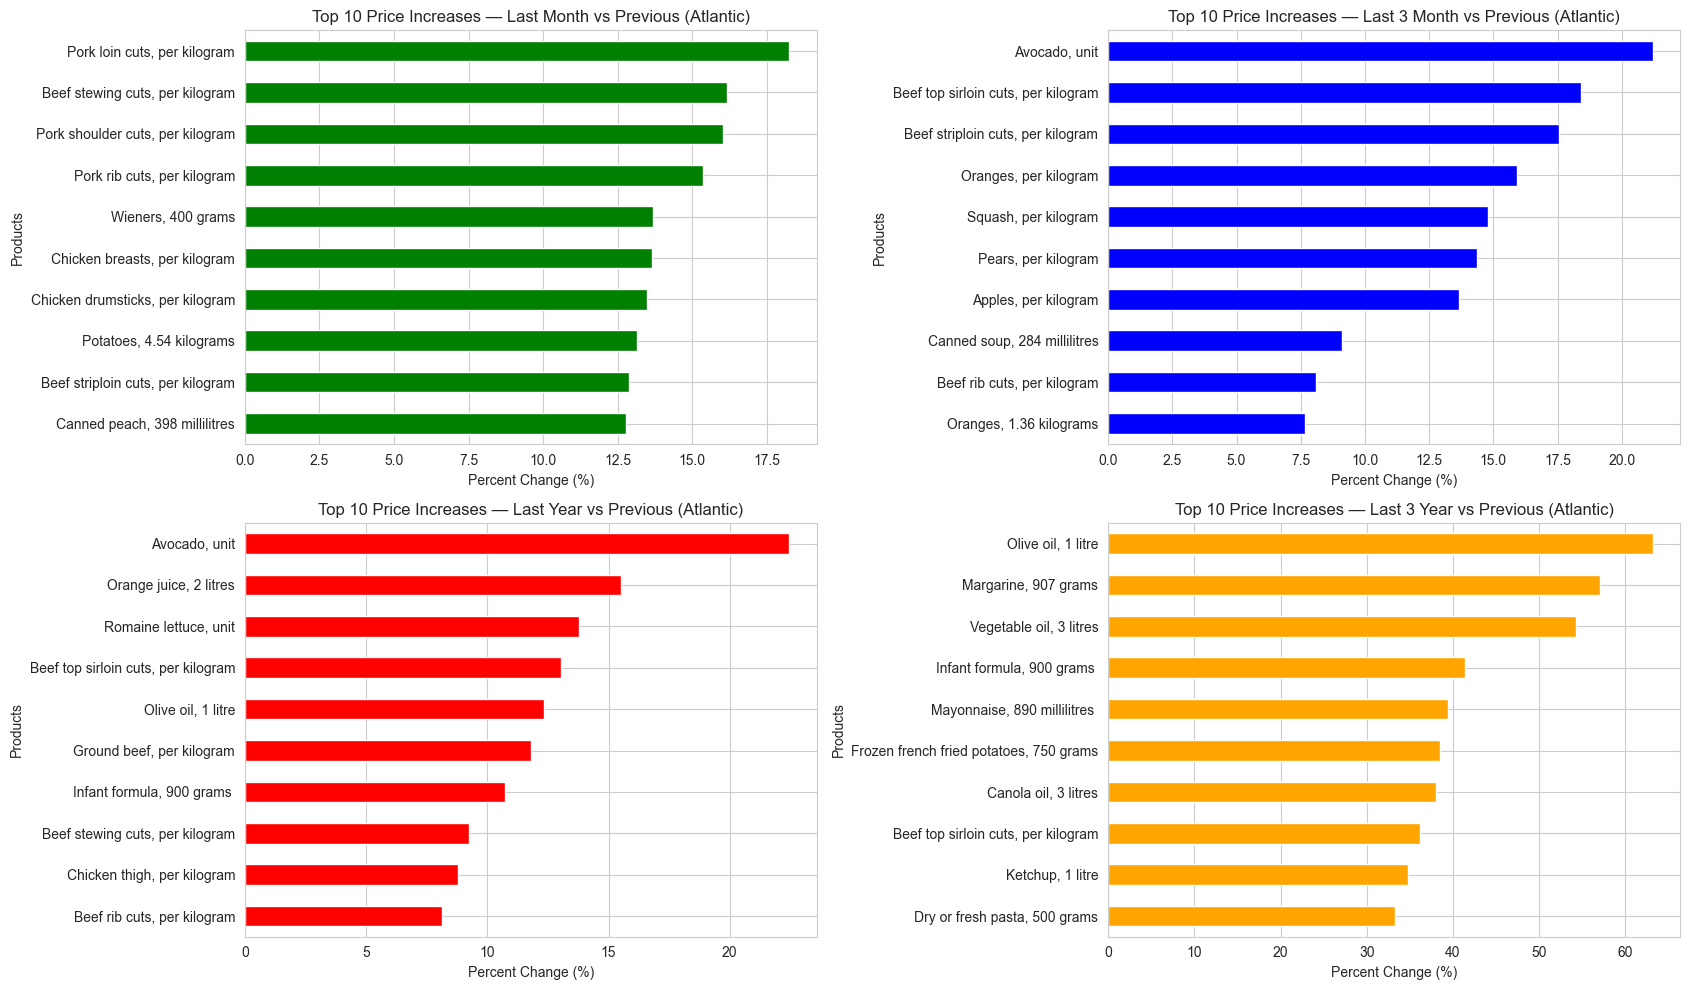

In [83]:
df_monthly = df_atl.groupby([df_atl['REF_DATE'].dt.to_period('M'), 'Products'])['VALUE'].mean().unstack()

monthly_change = df_monthly.pct_change(periods=1).iloc[-1] * 100

last3_avg = df_monthly.iloc[-3:].mean()
prev3_avg = df_monthly.iloc[-6:-3].mean()
change_3m = ((last3_avg - prev3_avg) / prev3_avg) * 100

last12_avg = df_monthly.iloc[-12:].mean()
prev12_avg = df_monthly.iloc[-24:-12].mean()
change_1y = ((last12_avg - prev12_avg) / prev12_avg) * 100

last5y_avg = df_monthly.iloc[-36:].mean()
prev5y_avg = df_monthly.iloc[-72:-36].mean()
change_5y = ((last5y_avg - prev5y_avg) / prev5y_avg) * 100

plt.figure(figsize=(17, 10))
plt.subplot(2,2,1)
monthly_change.sort_values(ascending=False).head(10).plot(kind='barh', color='green')
plt.gca().invert_yaxis()
plt.title('Top 10 Price Increases — Last Month vs Previous (Atlantic)')
plt.xlabel('Percent Change (%)')
plt.tight_layout()
#plt.xlim(right=58)
#plt.show()

plt.subplot(2,2,2)

change_3m.sort_values(ascending=False).head(10).plot(kind='barh', color='blue')
plt.gca().invert_yaxis()
plt.title('Top 10 Price Increases — Last 3 Month vs Previous (Atlantic)')
plt.xlabel('Percent Change (%)')
plt.tight_layout()
#plt.xlim(right=58)
#plt.show()

plt.subplot(2,2,3)

change_1y.sort_values(ascending=False).head(10).plot(kind='barh', color='red')
plt.gca().invert_yaxis()
plt.title('Top 10 Price Increases — Last Year vs Previous (Atlantic)')
plt.xlabel('Percent Change (%)')
plt.tight_layout()
#plt.xlim(right=58)
#plt.show()

plt.subplot(2,2,4)
change_5y.sort_values(ascending=False).head(10).plot(kind='barh', color='orange')
plt.gca().invert_yaxis()
plt.title('Top 10 Price Increases — Last 3 Year vs Previous (Atlantic)')
plt.xlabel('Percent Change (%)')
plt.tight_layout()
#plt.xlim(right=58)

plt.show()

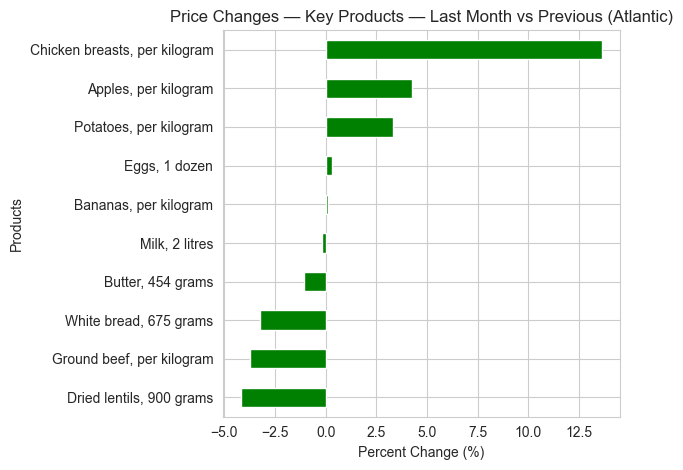

In [101]:
important_products = [
    'Milk, 2 litres',
    'Eggs, 1 dozen',
    'White bread, 675 grams',
    'Potatoes, per kilogram',
    'Dried lentils, 900 grams',
    'Chicken breasts, per kilogram',
    'Ground beef, per kilogram',
    'Apples, per kilogram',
    'Bananas, per kilogram',
    'Butter, 454 grams'
]

monthly_change_selected = monthly_change[important_products]

monthly_change_selected.sort_values(ascending=False).plot(kind='barh', color='green')
plt.gca().invert_yaxis()
plt.title('Price Changes — Key Products — Last Month vs Previous (Atlantic)')
plt.xlabel('Percent Change (%)')
plt.tight_layout()
plt.show()

In [15]:
df_atl = df[df['GEO'].isin(atlantic_provinces)]

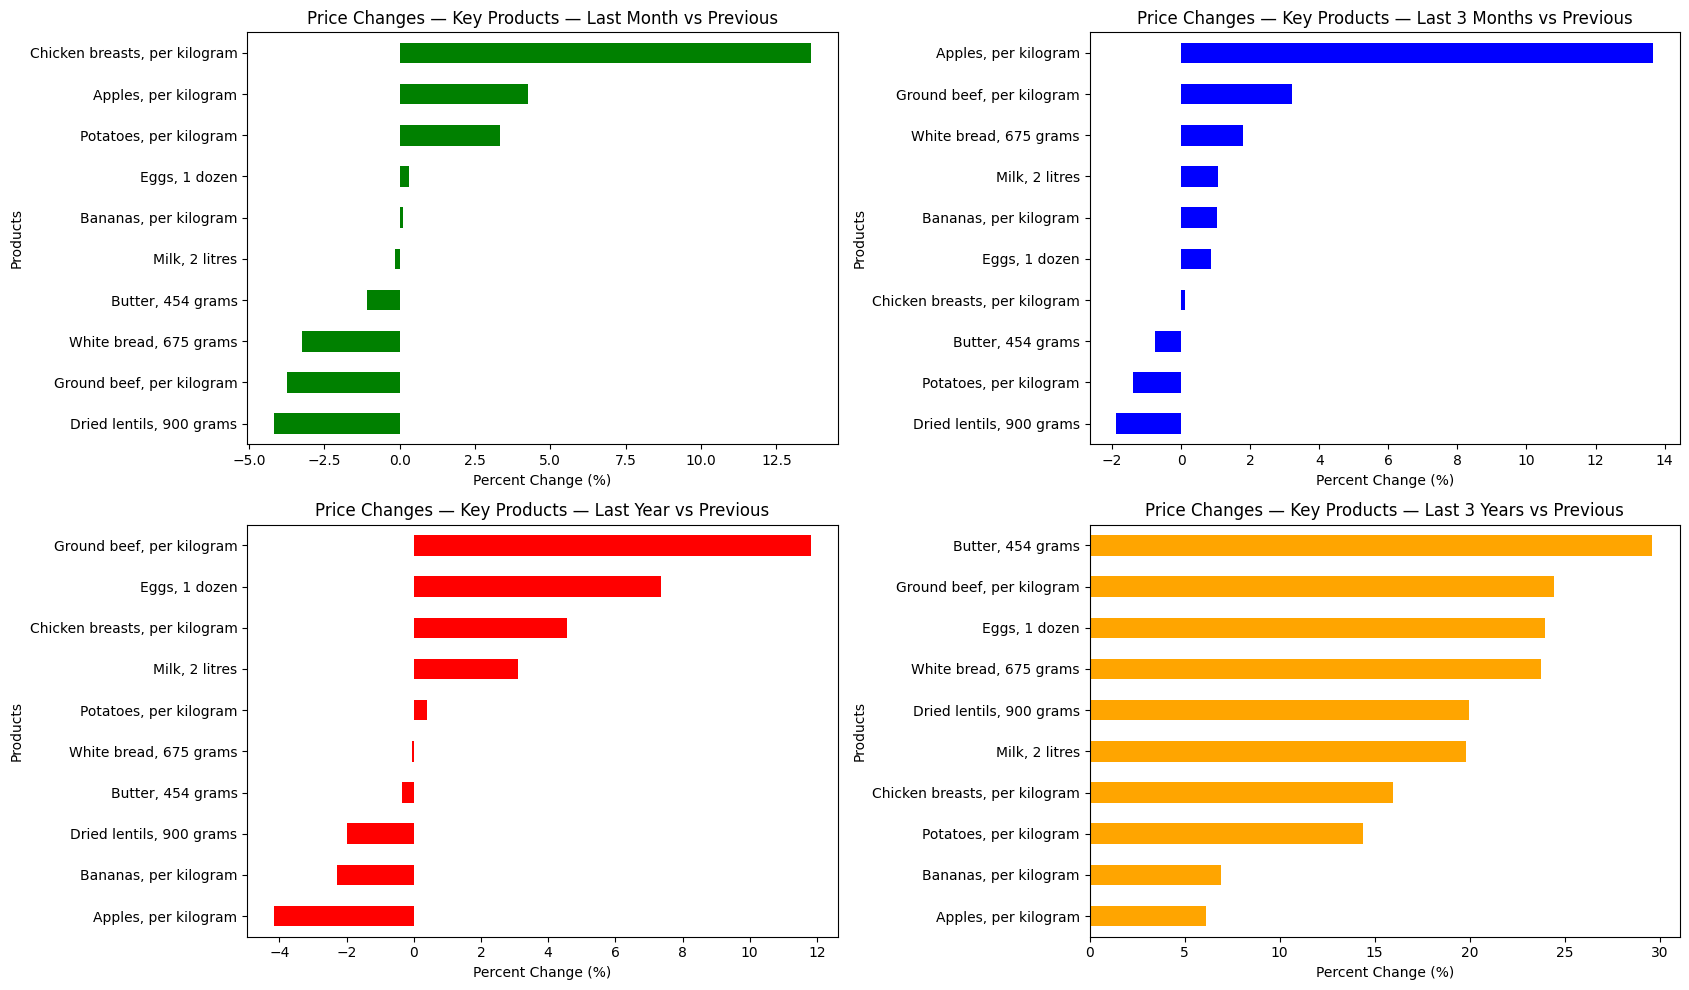

In [18]:
important_products = [
    'Milk, 2 litres',
    'Eggs, 1 dozen',
    'White bread, 675 grams',
    'Potatoes, per kilogram',
    'Dried lentils, 900 grams',
    'Chicken breasts, per kilogram',
    'Ground beef, per kilogram',
    'Apples, per kilogram',
    'Bananas, per kilogram',
    'Butter, 454 grams'
]

df_monthly = df_atl.groupby([df_atl['REF_DATE'].dt.to_period('M'), 'Products'])['VALUE'].mean().unstack()

monthly_change = df_monthly.pct_change(periods=1).iloc[-1] * 100

last3_avg = df_monthly.iloc[-3:].mean()
prev3_avg = df_monthly.iloc[-6:-3].mean()
change_3m = ((last3_avg - prev3_avg) / prev3_avg) * 100

last12_avg = df_monthly.iloc[-12:].mean()
prev12_avg = df_monthly.iloc[-24:-12].mean()
change_1y = ((last12_avg - prev12_avg) / prev12_avg) * 100

last5y_avg = df_monthly.iloc[-36:].mean()
prev5y_avg = df_monthly.iloc[-72:-36].mean()
change_5y = ((last5y_avg - prev5y_avg) / prev5y_avg) * 100

monthly_change_selected = monthly_change[important_products]
change_3m_selected = change_3m[important_products]
change_1y_selected = change_1y[important_products]
change_5y_selected = change_5y[important_products]

plt.figure(figsize=(17, 10))

plt.subplot(2, 2, 1)
monthly_change_selected.sort_values(ascending=False).plot(kind='barh', color='green')
plt.gca().invert_yaxis()
plt.title('Price Changes — Key Products — Last Month vs Previous')
plt.xlabel('Percent Change (%)')

plt.subplot(2, 2, 2)
change_3m_selected.sort_values(ascending=False).plot(kind='barh', color='blue')
plt.gca().invert_yaxis()
plt.title('Price Changes — Key Products — Last 3 Months vs Previous')
plt.xlabel('Percent Change (%)')

plt.subplot(2, 2, 3)
change_1y_selected.sort_values(ascending=False).plot(kind='barh', color='red')
plt.gca().invert_yaxis()
plt.title('Price Changes — Key Products — Last Year vs Previous')
plt.xlabel('Percent Change (%)')

plt.subplot(2, 2, 4)
change_5y_selected.sort_values(ascending=False).plot(kind='barh', color='orange')
plt.gca().invert_yaxis()
plt.title('Price Changes — Key Products — Last 3 Years vs Previous')
plt.xlabel('Percent Change (%)')

plt.tight_layout()
plt.show()

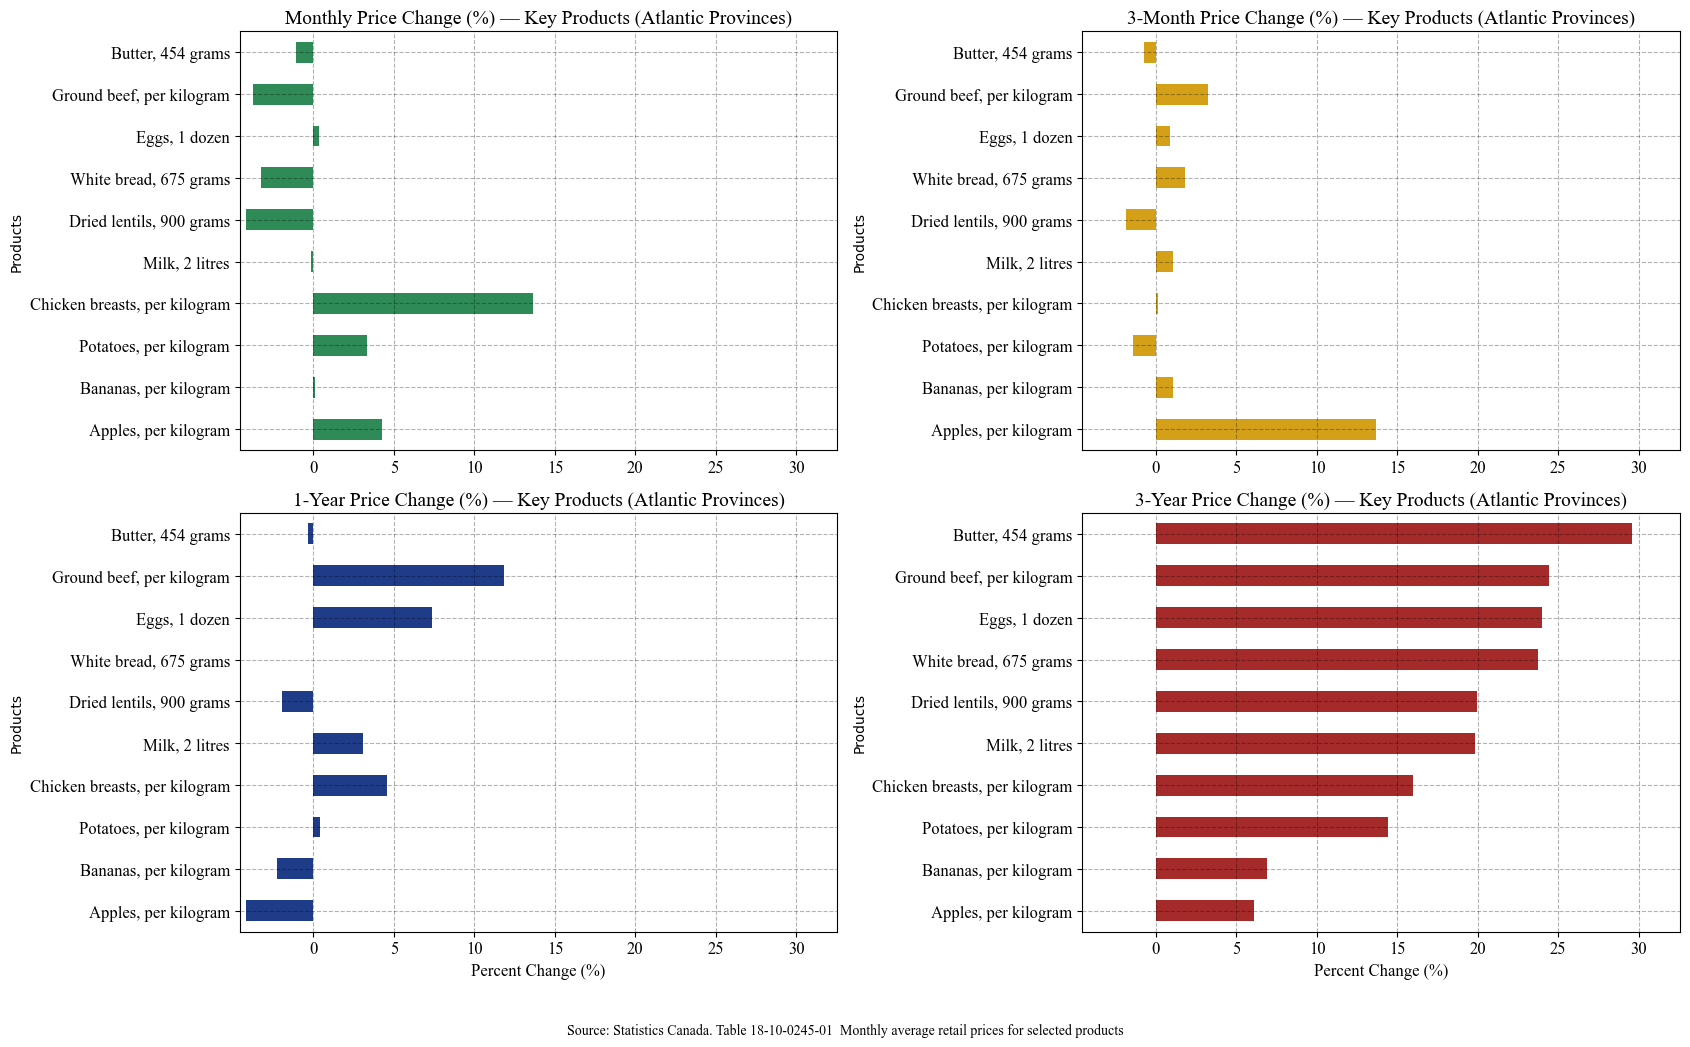

In [20]:
product_order = change_5y_selected.sort_values(ascending=False).index.tolist()


professional_colors = ['#2e8b57', '#d4a017', '#a52a2a', '#1f3c88']

min_x = min(
    monthly_change_selected[product_order].min(),
    change_3m_selected[product_order].min(),
    change_1y_selected[product_order].min(),
    change_5y_selected[product_order].min()
)

max_x = max(
    monthly_change_selected[product_order].max(),
    change_3m_selected[product_order].max(),
    change_1y_selected[product_order].max(),
    change_5y_selected[product_order].max()
)


plt.figure(figsize=(17, 10))

plt.subplot(2, 2, 1)
monthly_change_selected[product_order].plot(kind='barh', color=professional_colors[0])
plt.gca().invert_yaxis()
plt.title('Monthly Price Change (%) — Key Products (Atlantic Provinces)', fontsize=14, fontname='Times New Roman')
#plt.xlabel('Percent Change (%)', fontsize=12, fontname='Times New Roman')
plt.xlim(min_x * 1.1, max_x * 1.1)
plt.xticks(fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')
plt.grid(ls='--', c = 'k', alpha=0.3, )


plt.subplot(2, 2, 2)
change_3m_selected[product_order].plot(kind='barh', color=professional_colors[1])
plt.gca().invert_yaxis()
plt.title('3-Month Price Change (%) — Key Products (Atlantic Provinces)', fontsize=14, fontname='Times New Roman')
#plt.xlabel('Percent Change (%)', fontsize=12, fontname='Times New Roman')
plt.xlim(min_x * 1.1, max_x * 1.1)
plt.xticks(fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')
plt.grid(ls='--', c = 'k', alpha=0.3, )


plt.subplot(2, 2, 3)
change_1y_selected[product_order].plot(kind='barh', color=professional_colors[3])
plt.gca().invert_yaxis()
plt.title('1-Year Price Change (%) — Key Products (Atlantic Provinces)', fontsize=14, fontname='Times New Roman')
plt.xlabel('Percent Change (%)', fontsize=12, fontname='Times New Roman')
plt.xlim(min_x * 1.1, max_x * 1.1)
plt.xticks(fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')
plt.grid(ls='--', c = 'k', alpha=0.3, )


plt.subplot(2, 2, 4)
change_5y_selected[product_order].plot(kind='barh', color=professional_colors[2])
plt.gca().invert_yaxis()
plt.title('3-Year Price Change (%) — Key Products (Atlantic Provinces)', fontsize=14, fontname='Times New Roman')
plt.xlabel('Percent Change (%)', fontsize=12, fontname='Times New Roman')
plt.xlim(min_x * 1.1, max_x * 1.1)
plt.xticks(fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')
plt.grid(ls='--', c = 'k', alpha=0.3, )

plt.figtext(0.5, -0.04,
            'Source: Statistics Canada. Table 18-10-0245-01  Monthly average retail prices for selected products',
            wrap=True, horizontalalignment='center', fontsize=10, fontname='Times New Roman', weight='medium')



plt.tight_layout()
#plt.savefig('Price_Change_Key_Products_Atlantic_Provinces2.png', dpi=300, bbox_inches='tight')

plt.show()